# Ensemble Methods in `sklearn`

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, VotingRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer, load_diabetes

In [6]:
diabetes = load_diabetes()
cancer = load_breast_cancer()

In [7]:
#our regression data
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [8]:
#classification data
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
X, y = cancer.data, cancer.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
lgr = LogisticRegression(solver = 'lbfgs')
svc = SVC(probability=True)
dtree = DecisionTreeClassifier()

In [12]:
lgr.__class__.__name__

'LogisticRegression'

In [13]:
voter = VotingClassifier([('lgr', lgr), ('svm', svc), ('dtree', dtree)], voting = 'soft')

In [14]:
scores = []
for clf in lgr, svc, dtree, voter:
    clf.fit(X_train, y_train)
    scores.append((clf.__class__.__name__, clf.score(X_test, y_test)))

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma e

In [15]:
scores

[('LogisticRegression', 0.9370629370629371),
 ('SVC', 0.6153846153846154),
 ('DecisionTreeClassifier', 0.9230769230769231),
 ('VotingClassifier', 0.958041958041958)]

In [16]:
clfs = [i[0] for i in scores]
s = [i[1] for i in scores]

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

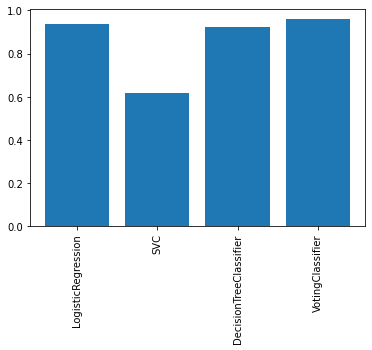

In [17]:
clfs = [i[0] for i in scores]
s = [i[1] for i in scores]
plt.bar(clfs, s)
plt.xticks(rotation = 90)

### Bagging

In [18]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [19]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

In [28]:
pasting = BaggingClassifier(dtree,bootstrap=False)
bag = BaggingClassifier(dtree, oob_score=True)

In [29]:
#bag.fit(X_train, y_train)
pasting.fit(X_train, y_train)
bag.fit(X_train, y_train)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [30]:
bag.oob_score_

0.931924882629108

In [31]:
bag.score(X_test, y_test)

0.972027972027972

In [32]:
scores.append((pasting.__class__.__name__, pasting.score(X_test, y_test)))

In [33]:
pasting.score(X_test, y_test)

0.9300699300699301

In [34]:
bag.score(X_test, y_test)

0.972027972027972

### Boosting

In [35]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [36]:
ada = AdaBoostClassifier(dtree)
grad = GradientBoostingClassifier()

In [37]:
ada.fit(X_train, y_train)
grad.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [38]:
scores.append((ada.__class__.__name__, ada.score(X_test, y_test)))
scores.append((grad.__class__.__name__, grad.score(X_test, y_test)))

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

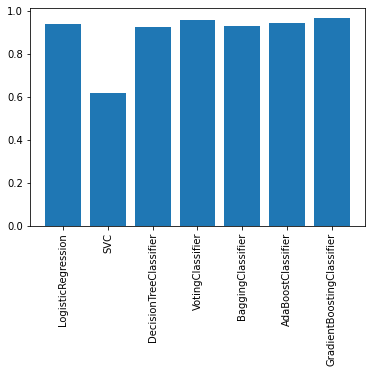

In [39]:
clfs = [i[0] for i in scores]
s = [i[1] for i in scores]
plt.bar(clfs, s)
plt.xticks(rotation = 90)

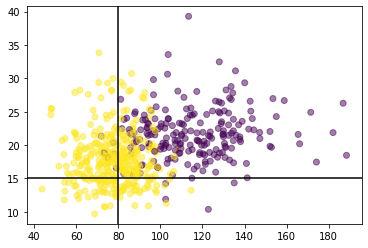

In [76]:
plt.scatter(X[:, 2], X[:, 1], c = y, alpha = 0.5)
plt.axvline(80, color = 'black')
plt.axhline(15, color = 'black')